**Import all the liberaries**

In [30]:
pip install scikit-plot

In [31]:

import scikitplot as skplt
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_regression
from sklearn.model_selection import train_test_split
import numpy as np
import math
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

**Load dataset**

In [32]:
df=pd.read_excel('Akanksha Dewangan - Data for AI-Assignment-3.xlsx')  

**1.Preprocessing and Analysis**

In [33]:
df.head(4)

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,High-Salary
0,203097,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455,1
1,579905,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637,1
2,810601,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.8682,0.6721,1
3,267447,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.4078,-0.9194,1


In [34]:
print("shape of data: ",df.shape)

shape of data:  (3998, 34)


**data informtaion**

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Gender                 3998 non-null   object        
 2   DOB                    3998 non-null   datetime64[ns]
 3   10percentage           3998 non-null   float64       
 4   10board                3998 non-null   object        
 5   12graduation           3998 non-null   int64         
 6   12percentage           3998 non-null   float64       
 7   12board                3998 non-null   object        
 8   CollegeID              3998 non-null   int64         
 9   CollegeTier            3998 non-null   int64         
 10  Degree                 3998 non-null   object        
 11  Specialization         3998 non-null   object        
 12  collegeGPA             3998 non-null   float64       
 13  Col

**-Checking class Imbalance**

**Here both classes 0 and 1 denotes non-high, high salary respectively are in balanced ration of 53:46 so their will be no biasing toward any of the class while training the model. Hence class is balanced.**

1    2135
0    1863
Name: High-Salary, dtype: int64


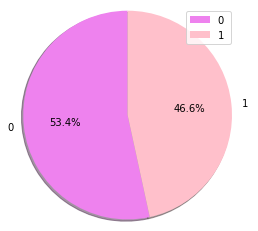

In [36]:

total_count =df['High-Salary'].value_counts()
print(total_count)
colors=['violet','pink']
activities = ['0','1 '] 
plt.pie(total_count, labels = activities, colors=colors,  
        startangle=90, shadow = True, explode = (0, 0), 
        radius = 1.2, autopct = '%1.1f%%') 
plt.legend() 
plt.show()

**-Correlation between the columns**

**Here we check whether is their any columns which are similar to each other so we can drop if two column are same. But in below heatmap no one are correlated to each other as no one is having light color map which conclude that no two columns are correlate to drop, not even they relate to 90%**

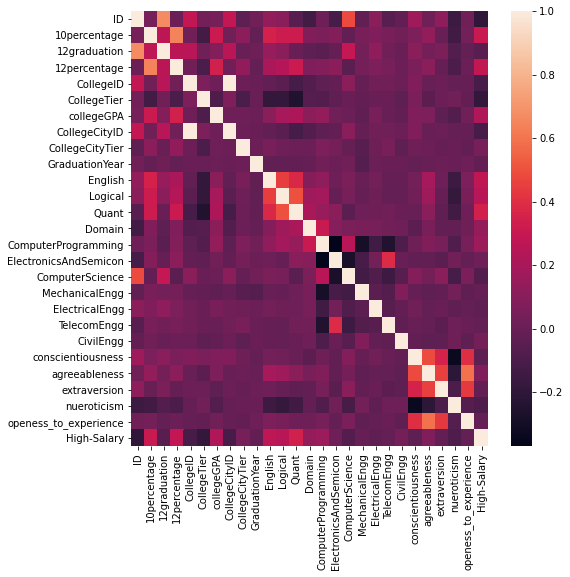

In [37]:
# heat map to show the correlation between the columns

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=False)
plt.ioff()
plt.savefig('corr.png')

**-Histogram plot for every attribute.**

**A histogram divides the values within a numerical variable into “bins”, and counts the number of observations that fall into each bin. By visualizing these binned counts in a columnar fashion, we can obtain a very immediate and intuitive sense of the distribution of values within a variable.**

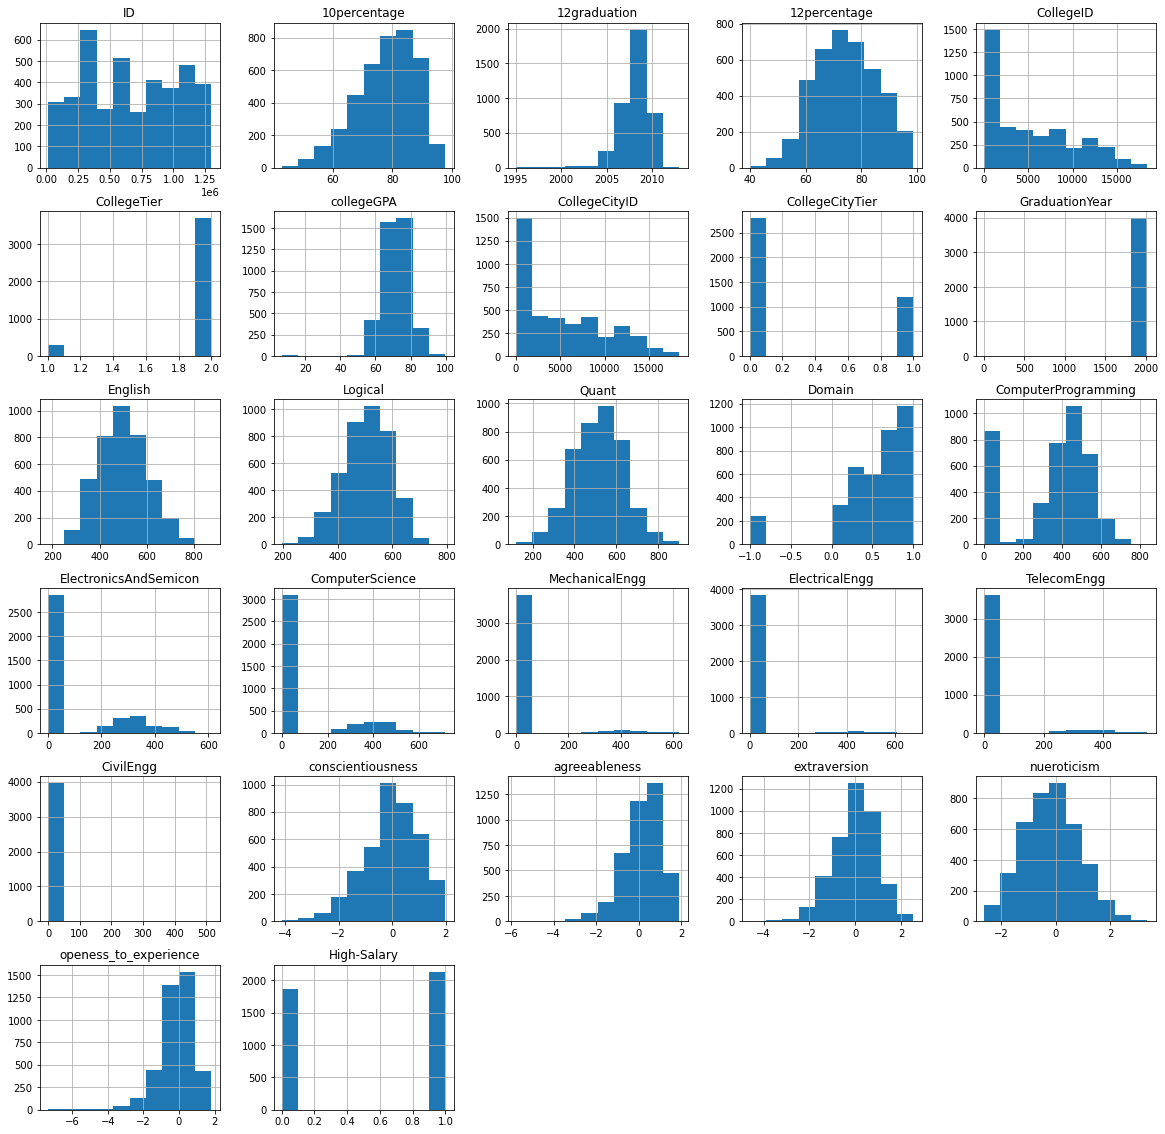

In [38]:
#histogram for every attribute
df.hist(figsize = (20, 20))
plt.show()

**Preprocessing**

**-Removing target column from the dataset and put it in one variable so can use furthur.**

In [39]:
df_label=df['High-Salary']
df=df.drop(['High-Salary'], axis=1)

In [40]:
print("Column names are:",list(df.columns))
print("Total Columns currently are after removing target column: ",len(df.columns))

Column names are: ['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation', '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
Total Columns currently are after removing target column:  33


**-Encoding of catagory attributes.**

**Here I encoded all the catagorical columns into the number form by assigning numbers to the values as per they are uniquely present. Encoded columns are: Gender, 10borad, Degree, Specialization, CollegeState, 12board.**

In [41]:
df['Gender']=df['Gender'].astype('category').cat.codes
# df['DOB']=df['DOB'].astype('category')
df['10board']=df['10board'].astype('category').cat.codes
df['Degree']=df['Degree'].astype('category').cat.codes
df['Specialization']=df['Specialization'].astype('category').cat.codes
df['CollegeState']=df['CollegeState'].astype('category').cat.codes
df['12board']=df['12board'].astype('category').cat.codes

**-Here I tried to take only years of date of birth and then label encode the DOB column.**:

In [42]:
df['DOB'] =[int(dt.split('-')[0]) for dt in df['DOB'].dt.strftime('%Y-%m-%d')]

In [43]:
df['DOB']=df['DOB'].astype('category').cat.codes

**-These is Final data after above preprocessing.**
**-But after applying them on logistic regression accuracy is not increasing thats why we are dropping few column like '10board','12board','DOB', becuase their presence doesnt affect the accuracy as much.**

In [44]:
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,0,10,84.3,43,2007,95.8,47,1141,2,0,10,78.00,1141,0,0,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,1,9,85.4,60,2007,85.0,77,5807,2,0,21,70.06,5807,0,13,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,0,12,85.0,60,2010,68.2,77,64,2,0,33,70.00,64,0,23,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1,9,85.6,60,2007,83.6,77,6920,1,0,10,74.64,6920,1,4,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,1,11,78.0,60,2008,76.8,77,11368,2,0,21,73.90,11368,0,23,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


**-Drop '10board','12board','DOB' columns:**

In [45]:
df=df.drop(['10board','12board','DOB'],axis=1)

**With Scaling**

**-Here I have done minmax sacling which transformed the values in between 0 to 1, and then futhur we can apply feature selection.**

In [46]:
scaler = MinMaxScaler().fit(df)
df=scaler.transform(df)

**Feature selection:**

**-select k best feature selection is applied with which 20  features are taken out.**

In [47]:
df=SelectKBest(score_func=f_regression,k=20).fit_transform(df,df_label)

**Train-test split:**

**60:40, 70:30, 90:10**

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df, df_label, test_size=0.3, random_state=10)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2798, 20)
(1200, 20)
(2798,)
(1200,)


**MODEL-**

**-Grid search cross validation:**

**-Here for tunning the parameters of logistic regression, we used gridsearchcv**

In [50]:
grid={"C":[0.5,1,1.5,2,10,10.5,11,11.5], "penalty":["l1","l2"]}
logreg= LogisticRegression(random_state=10,solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)
pre=logreg_cv.predict(X_test)

In [51]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l1'}


In [52]:
print("crossvalidation score : ",accuracy_score(y_train, logreg_cv.predict(X_train)))

crossvalidation score :  0.718012866333095


In [53]:
print("Test data Accuracy: ",accuracy_score(y_test, pre))

Test data Accuracy:  0.7383333333333333


In [54]:
print("2D-Confusion Matrix\n")
cm = confusion_matrix(y_test, pre)
print(cm)

2D-Confusion Matrix

[[405 177]
 [137 481]]


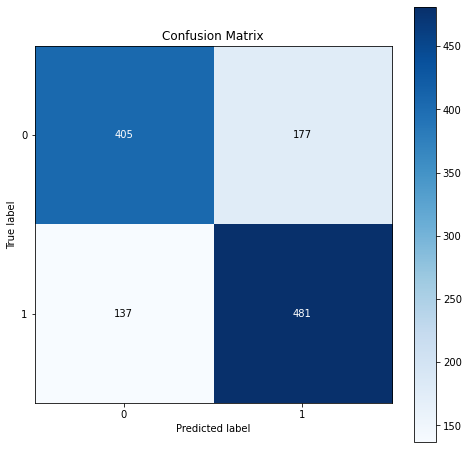

In [55]:
skplt.metrics.plot_confusion_matrix(
    y_test, 
    pre,
    figsize=(8,8))

**Class wise accuracy:**

In [56]:

cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
print("Class 0 accurcay :",cm.diagonal()[0], ", Class  1 accurcay: ",cm.diagonal()[1])

Class 0 accurcay : 0.6958762886597938 , Class  1 accurcay:  0.7783171521035599


In [57]:
def Accuracy(tp,tn,fp,fn):
  if (tp+tn+fp+fn)!=0:
    acc=(tp+tn)/(tp+tn+fp+fn)
  else:
    acc=0
  return acc
def Sensitivity(tp,tn,fp,fn):
  if (tp+fn)!=0:
    sen=tp/(tp+fn)
  else:
    sen=0
  return sen
def Specificity(tp,tn,fp,fn):
  if (tn+fp)!=0:
   spec=tn/(tn+fp)
  else:
    spec=0
  return spec

In [58]:
tn, fp, fn, tp = confusion_matrix(y_test, pre).ravel()
print("--------------analysis on test data------------")
print("Accuracy: ",Accuracy(tp,tn,fp,fn))
print("Sensitivity: ",Sensitivity(tp,tn,fp,fn))
print("Specificity:",Specificity(tp,tn,fp,fn))

--------------analysis on test data------------
Accuracy:  0.7383333333333333
Sensitivity:  0.7783171521035599
Specificity: 0.6958762886597938
